<a href="https://colab.research.google.com/github/bryaanabraham/Machine_Learning/blob/main/Magic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains information with target variable showing whether a g(gamma) or h(hadron) particle is present.<br>
The following model will attempt to predict the target variable "class".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.read_csv("magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
13573,13.1972,11.7719,2.4280,0.7389,0.4860,7.5040,12.4199,7.2540,36.4006,202.9589,h
13574,101.4460,58.8768,3.8703,0.1519,0.0760,24.2853,-68.0601,-28.4106,24.7020,407.4410,h
13575,25.4663,17.1171,2.7423,0.3710,0.2091,4.2117,20.3061,6.0298,21.3330,56.2445,h
13576,38.9253,6.3582,2.6497,0.5746,0.3644,29.9431,24.2609,-12.0692,8.9779,249.9302,h


In [3]:
cols=["fLenght", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3long", "fM3trans", "fAlpha", "fDist", "class"]
df=pd.read_csv("magic04.data", names=cols)
df.head()

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3long,fM3trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"].unique()

array(['g', 'h', nan], dtype=object)

In [5]:
df["class"]=(df["class"]=="g").astype(int)

In [6]:
df["class"].unique()

array([1, 0])

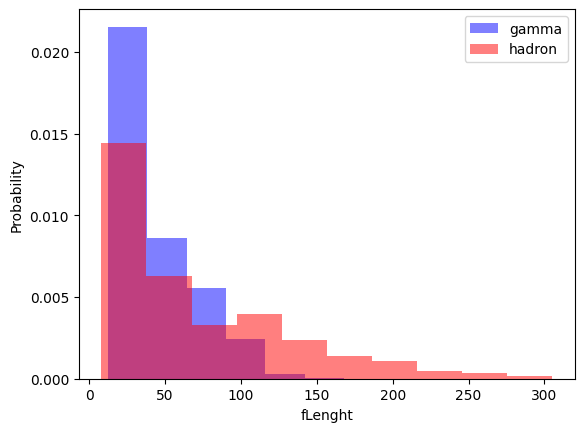

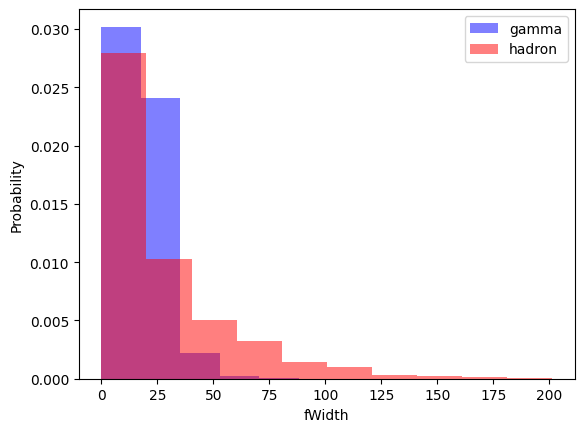

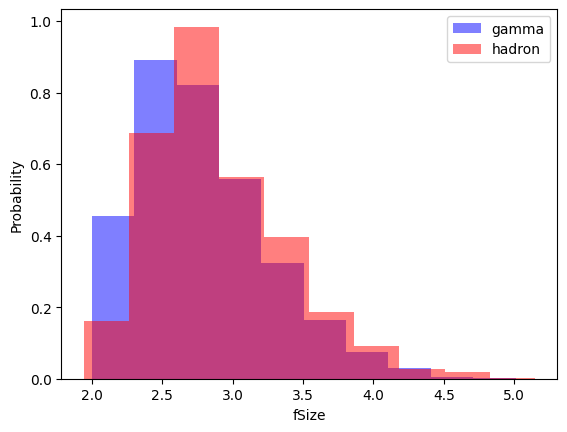

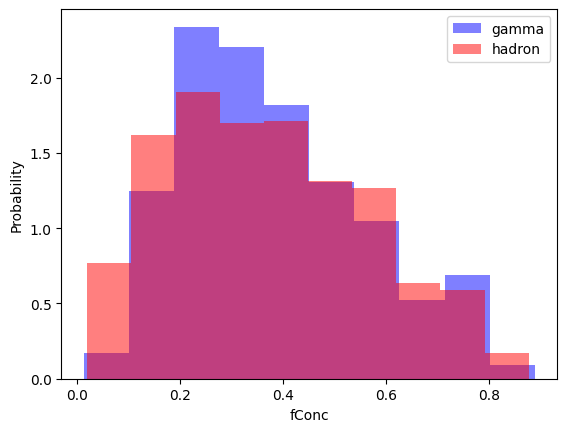

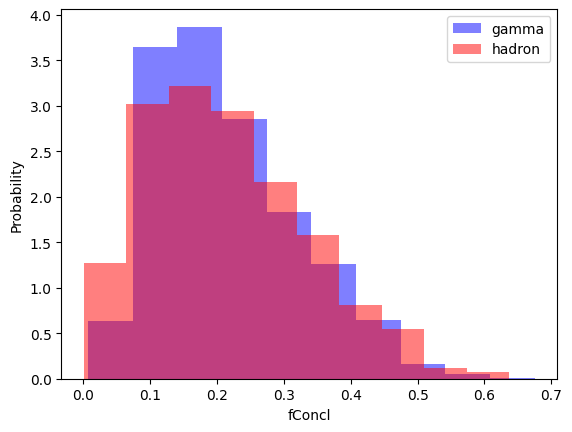

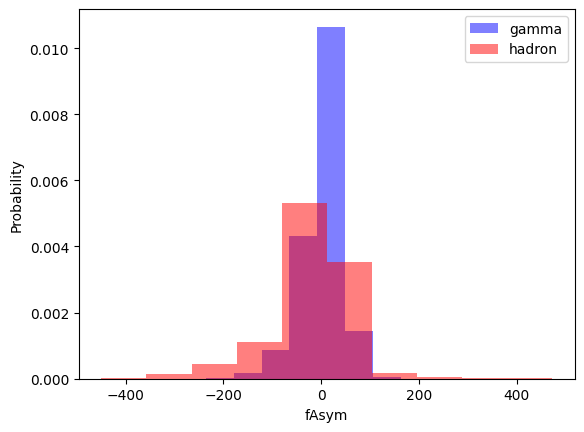

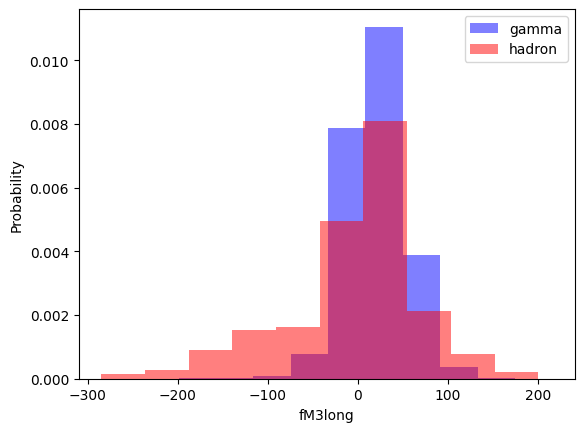

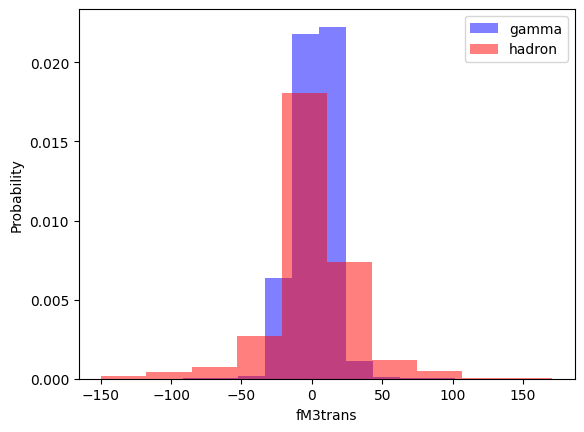

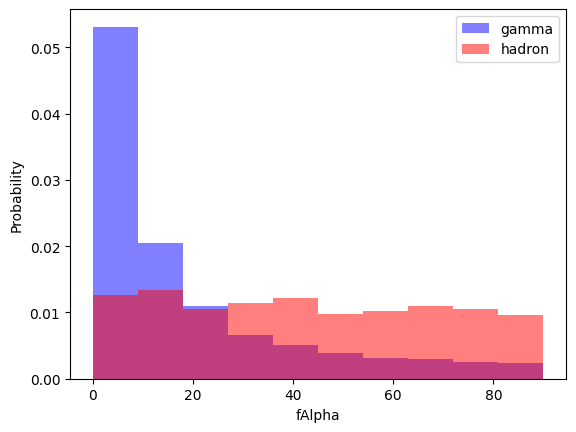

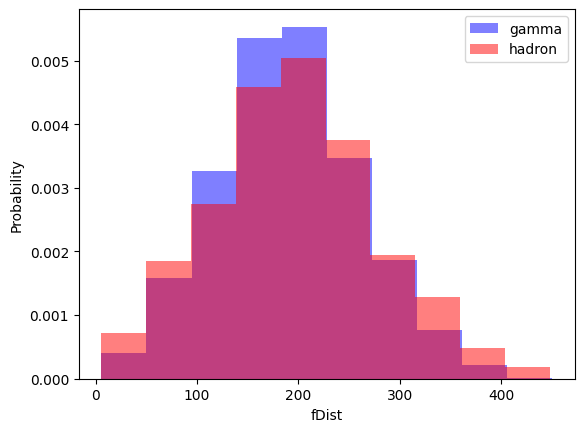

In [7]:
for labels in cols[:-1]:
  plt.hist(df[df["class"]==1][labels],color='blue', label='gamma', alpha=0.5, density=True)
  plt.hist(df[df["class"]==0][labels],color='red', label='hadron', alpha=0.5, density=True)
  plt.ylabel("Probability")
  plt.xlabel(labels)
  plt.legend()
  plt.show()

In [47]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [48]:
X_train, y_train = train[train.columns[:-1]].values, train[train.columns[-1]].values
X_valid, y_valid = valid[valid.columns[:-1]].values, valid[valid.columns[-1]].values
X_test, y_test = test[test.columns[:-1]].values, test[test.columns[-1]].values

In [49]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7370
777


since the number of values representing hadron and gamma are not the same i.e. the dataset does not conclude to same number of gamma and haddron variable, we may need to use random oversampling in a function which will equalize the count of zeroes and ones in the target attribute.

In [50]:
from imblearn.over_sampling import RandomOverSampler

We must scale the values in the dataset to lie between required range to carry out mathematical operations.<br>
we use reshape to ensure the dimensions of X and Y are same i.e. X is a 2D array but Y is a 1D array consisting of just the colums values of class(col[-1]).

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [53]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [56]:
from sklearn.impute import SimpleImputer

# Assuming X_train is your feature matrix with missing values
imputer = SimpleImputer(strategy='mean')  # You can choose strategy: 'mean', 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)


Oversampling is not done for validation and testing as we will receive random data and we need to trust our dataset will proud accurate results for any number of values of 'h' and 'g'

##KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [59]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_imputed, y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
y_pred =knn_model.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.41      0.48       250
           1       0.94      0.97      0.96      2466

    accuracy                           0.92      2716
   macro avg       0.76      0.69      0.72      2716
weighted avg       0.91      0.92      0.91      2716

